# Intro to Statistics

* Segment1: Frequentist Statistics (as covered in 1_Describing_Distributions.ipynb)

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

#### z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:

\begin{align}
z = \frac{x_i-\mu}{\sigma}
\end{align}

That is, the formula standardizes a given score $x_i$ to the (standard normal) z-distribution. (As we covered in *Probability & Information Theory, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

For example, let's say you get 85% on a CS101 exam. Sounds like a pretty good score and you did extremely well relative to your peers if the mean was 60% with a standard deviation of 10%:

In [3]:
x_i = 85
mu = 60
sigma = 10

x = np.random.normal(mu, sigma, 10000)

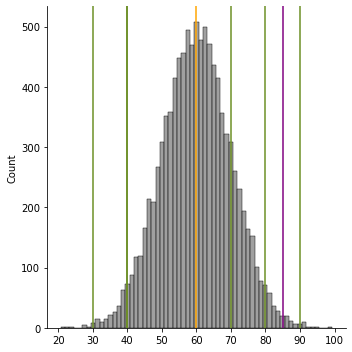

In [10]:
sns.displot(x, color='gray')
ax.set_xlim(0,100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -2, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [11]:
# your z-score is 2.5 standard deviations above the mean:

z = (x_i - mu)/sigma
z

2.5

In [12]:
# or using our simulated class of 10k CS101 students:

z = (x_i - np.mean(x))/np.std(x)
z

2.493627213305282

In [13]:
# less than one percent of the class outperformed you

len(np.where(x > 85)[0])

68

In [14]:
100*69/10000

0.69

In [15]:
np.percentile(x,99)

83.2483020263407

In contrast, if the mean score of your peers is 90 and the standard deviation is 2:

In [16]:
mu = 90
sigma = 2

y = np.random.normal(mu, sigma, 10000)

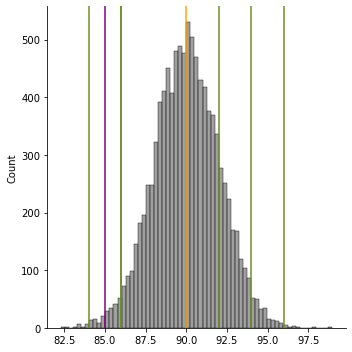

In [18]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -2, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [19]:
# your z-score is 2.5 standard deviation below the mean(!):

z = (x_i - mu)/sigma
z

-2.5

In [20]:
# or using our simulated class of 10k CS101 students:

z = (x_i -np.mean(y))/np.std(y)
z

-2.5111228733891138

In [21]:
# in which case, over 99% of the class outperformed you:

len(np.where(y > 85)[0])

9929

In [22]:
100*9929/10000

99.29

In [23]:
# a mere 67 folks attained worse:
10000-9933

67

In [24]:
np.percentile(y,1)

85.24477191128159

#### p-values

These quantify the probability that a given observation would occur by chance alone.

For example, we saw above that with our simulated 10k exam results, only 69 folks attained a z-score above 2.5 and only 67 (=10000-9993) attained a z-score below -2.5. Thus, if we were to randomly sample one of the 10k CS101 exam results, we would expect it to be outside of 2.5 (i.e., +/-2.5) standard deviations only 1.36% of the time:

\begin{align}
\frac{67 + 67}{10000} = 0.0136 = 1.36%
\end{align}

Equivalent to increasing our CS101 class size from 10k toward infinity, the probability of a score being further than 2.5 standard deviations from the mean of a normal distribution can be determined with the distribution's *cumulative distribution function* (CDF):

In [25]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [26]:
p_below*10000

62.096653257761325

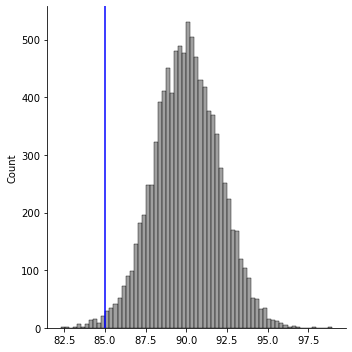

In [27]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [28]:
st.norm.cdf(2.5)

0.9937903346742238

In [29]:
p_above = 1 - st.norm.cdf(2.5)
p_above

0.006209665325776159

In [30]:
p_above*10000

62.09665325776159

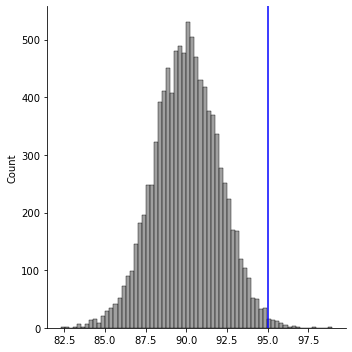

In [31]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [33]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [34]:
p_outside*10000

124.1933065155229

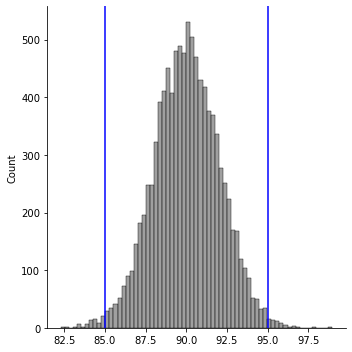

In [35]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In other words, assuming a normal distribution, the probability (the p-value) of a sampled value being at least 2.5 standard deviations away from the mean by chance alone is $p\approx.0124$.

The frequentist convention is that if a p-value is less than .05, we can say that it is a "statistically significant" observation. We typically denote this significance threshold with $\alpha$, e.g., $\alpha=.05$.

For example, with a fair coin, the probability of throwing six heads or six tails in a six-coin-flip experiment is 0.03125 ($p=0.015625$ for *either* of six heads or six tails). Refer back to the <code>coinflip_prob()</code> method from the Introduction notebook for proof.

If a friend of yours hands you a coin, the <strong>null hypothesis</strong> (the baseline assumed by the fair-toss distribution) would be that the coin is fair. If you test this coin by flipping it six times and it comes up heads on all six or tails on all six, this observation would suggest that you should reject the *null hypothesis* because chance alone would facilitate such an observation less than 5% of the time, i.e., $p<.05$.

The z-scores correspinding to $\alpha=.05$ can be obtained from the normal distribution's *percent point function* (PPF), which facilitates the inverse of the CDF. To capture 95% of the values around the mean, we leave 2.5% at the bottom of the distribution and 2.5% at the top:

In [36]:
st.norm.ppf(.025)

-1.9599639845400545

In [37]:
st.norm.ppf(.975)

1.959963984540054

Thus, at the traditional $\alpha=.05$, a sampled value with z-score less than -1.96 or greater than 1.96 would be considered statistically significant.

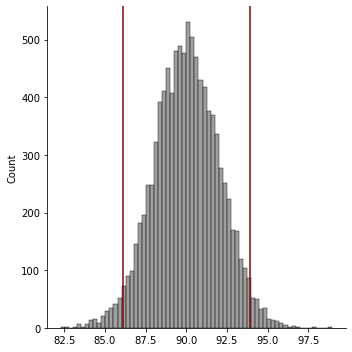

In [38]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')

<hr>

#### exercises

In [39]:
def p_from_z(my_z):
    return 2 * st.norm.cdf(-abs(my_z))

In [40]:
p_from_z(0) # z-score=mean -> it will definitely happen that a sample is above or below the mean

1.0

In [41]:
p_from_z(4)

6.334248366623973e-05

(Incidentally, very small $p$ values are often reported as <strong>negative log $P$</strong> values as these are much easier to read...)

In [42]:
-np.log10(6.33e-05)

4.198596289982645